# Convert_Coordinate
したいこと  
→HinodeのCSVデータの座標系がHelioprojectiveでSHARPデータセットの座標系がHeliographic Stonyhurstなのでこの座標系を統一して変換可能な形にしたい  
## 参考
[Sunpy-coordinate](https://docs.sunpy.org/en/0.7/code_ref/coordinates.html)

In [55]:
# Example
from astropy.wcs.utils import wcs_to_celestial_frame
import sunpy.coordinates
import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE
from astropy.coordinates import SkyCoord
import astropy.units as u
import datetime
amap = sunpy.map.Map(AIA_171_IMAGE)
wcs_to_celestial_frame(amap.wcs)

<Helioprojective Frame (obstime=2011-06-07T06:33:02.770, rsun=696000000.0 m, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.770): (lon, lat, radius) in (deg, deg, m)
    (-0.00406308, 0.04787238, 1.51846026e+11)>)>

## 座標系変換が一番の肝なのでそこを試してみる
Hinode→Helioprojective  
SWAN→Heliographic Stonyhurst


In [56]:
import pandas as pd
from sunpy.coordinates import frames
path = "../sot_sp/SOTSP_2010.csv"
sot_sp_df = pd.read_csv(path)
# c = Skycoord()
s=pd.Series(sot_sp_df.loc[0])
ll = [s["XCEN"]-s["FOVX"]//2,s["XCEN"]+s["FOVX"]//2]
ur =[s["YCEN"]-s["FOVY"]//2,s["YCEN"]+s["FOVY"]//2]
c=SkyCoord(ll*u.arcsec,ur*u.arcsec,frame = frames.Helioprojective,obstime= "2010-01-01",observer="earth")
c.transform_to(frames.HeliographicStonyhurst)

<SkyCoord (HeliographicStonyhurst: obstime=2010-01-01T00:00:00.000): (lon, lat, radius) in (deg, deg, AU)
    [(17.83207312, -33.35237352, 0.00465047),
     (37.45921616, -22.3977444 , 0.00465047)]>

AstropyのSkyCoordを経由して変換できることが確認できた。

## 比較用のそれぞれのデータセットを初期化


In [57]:
import glob
YEARS = [2010+i for i in range(10)]
SOT_SP_PATH = "../sot_sp/SOTSP_*.csv"
SOT_FG_PATH = "../sot_fg/SOTFG_*.csv"
EIS_PATH = "../eis/EIS_*.csv"
XRT_PATH = "../xrt/XRT_*.csv"
FLARE_PATH = "../flare/Flare2010.csv"
def path_to_dic(path_str):
    paths = sorted(glob.glob(path_str))
    paths_dic = {path.split("/")[-1][-8:-4]:path for path in paths}
    return paths_dic
def read_flare_csv(path_str):
    flare_df = pd.read_csv(FLARE_PATH,index_col=0)
    flare_df = flare_df.query('search_observatory=="SDO"')
    flare_df = flare_df.dropna(subset=["fl_goescls"])
    flare_df = flare_df.reset_index(drop=True)
    return flare_df
sot_sp_paths_dic = path_to_dic(SOT_SP_PATH)#各年度でPathを格納した辞書を作成
sot_fg_paths_dic = path_to_dic(SOT_FG_PATH)
eis_paths_dic = path_to_dic(EIS_PATH)
xrt_path_dic =path_to_dic(XRT_PATH)
flare_df = read_flare_csv(FLARE_PATH)

flare_df


,SOL_standard,fl_goescls,boundbox_c1ll,boundbox_c1ur,boundbox_c2ll,boundbox_c2ur,event_starttime,event_endtime,search_observatory
0,SOL2010-05-01T01:34:00L169C066,C5.7,-82.0,-80.0,23.0,25.0,2010-05-01T01:34:00,2010-05-01T01:43:00,SDO
1,SOL2010-05-01T05:23:00L173C068,B1.6,-76.0,-74.0,21.0,23.0,2010-05-01T05:23:00,2010-05-01T05:31:00,SDO
2,SOL2010-05-01T09:48:00L167C065,B1.0,-79.0,-77.0,24.0,26.0,2010-05-01T09:48:00,2010-05-01T09:52:00,SDO
3,SOL2010-05-02T06:03:00L173C066,B2.9,-62.0,-60.0,23.0,25.0,2010-05-02T06:03:00,2010-05-02T06:09:00,SDO
4,SOL2010-05-02T10:02:00L250C124,B3.8,16.0,18.0,-35.0,-33.0,2010-05-02T10:02:00,2010-05-02T10:09:00,SDO
...,...,...,...,...,...,...,...,...,...
813,SOL2010-12-17T07:17:00L072C071,B4.9,-17.0,-15.0,18.0,20.0,2010-12-17T07:17:00,2010-12-17T07:44:00,SDO
814,SOL2010-12-17T09:02:00L077C071,B2.1,-11.0,-9.0,18.0,20.0,2010-12-17T09:02:00,2010-12-17T09:06:00,SDO
815,SOL2010-12-17T11:31:00L008C086,B1.3,-79.0,-77.0,3.0,5.0,2010-12-17T11:31:00,2010-12-17T11:37:00,SDO
816,SOL2010-12-17T21:53:00L076C072,B2.4,-5.0,-3.0,17.0,19.0,2010-12-17T21:53:00,2010-12-17T23:21:00,SDO


In [58]:
# Flareデータを格納する列を追加
sot_fg_2010 = pd.read_csv(sot_fg_paths_dic["2010"])
def add_flare_series(df):
    df["CFlare"] = [ [] for i in range(len(df))]
    df["MFlare"] = [ [] for i in range(len(df))]
    df["XFlare"] = [ [] for i in range(len(df))]
    return df
sot_fg_2010 = add_flare_series(sot_fg_2010)
sot_fg_2010

,FILEPATH,DATE_OBS,DATE_END,XCEN,YCEN,FOVX,FOVY,CFlare,MFlare,XFlare
0,hinode/sot/level0/2010/01/01/FGMG/H0000/FGMG4_...,3.156193e+08,3.156193e+08,308.990,-414.820,225.280,112.640,[],[],[]
1,hinode/sot/level0/2010/01/01/FG/H0000/FG201001...,3.156195e+08,3.156195e+08,309.454,-414.742,188.283,111.575,[],[],[]
2,hinode/sot/level0/2010/01/01/FGMG/H0000/FGMG4_...,3.156195e+08,3.156195e+08,309.454,-414.897,225.280,112.640,[],[],[]
3,hinode/sot/level0/2010/01/01/FG/H0000/FG201001...,3.156196e+08,3.156196e+08,309.763,-414.974,188.283,111.575,[],[],[]
4,hinode/sot/level0/2010/01/01/FGMG/H0000/FGMG4_...,3.156196e+08,3.156197e+08,309.840,-414.742,225.280,112.640,[],[],[]
...,...,...,...,...,...,...,...,...,...,...
497719,hinode/sot/level0/2010/12/31/FGMG/H2300/FGMG4_...,3.471548e+08,3.471548e+08,-660.544,-401.379,225.280,112.640,[],[],[]
497720,hinode/sot/level0/2010/12/31/FG/H2300/FG201012...,3.471550e+08,3.471550e+08,-660.390,-401.224,188.283,111.575,[],[],[]
497721,hinode/sot/level0/2010/12/31/FGMG/H2300/FGMG4_...,3.471550e+08,3.471550e+08,-660.313,-401.301,225.280,112.640,[],[],[]
497722,hinode/sot/level0/2010/12/31/FG/H2300/FG201012...,3.471551e+08,3.471552e+08,-660.158,-401.224,188.283,111.575,[],[],[]


In [59]:
import utils
def convert_time(previous_df):
    converted_df = previous_df
    time_series = previous_df["DATE_OBS"]
    time_series = time_series +946652400 #UNIX時間(1970/1/1からの経過時間に合わせるために加算)
    time_series = time_series.map(lambda time: datetime.datetime.fromtimestamp(time))
    converted_df["DATE_OBS"] = time_series
    time_series = previous_df["DATE_END"]
    time_series = time_series +946652400 #UNIX時間(1970/1/1からの経過時間に合わせるために加算)
    time_series = time_series.map(lambda time: datetime.datetime.fromtimestamp(time))
    converted_df["DATE_END"] = time_series
    return converted_df
sot_fg_2010 =convert_time(sot_fg_2010)

sot_fg_2010

,FILEPATH,DATE_OBS,DATE_END,XCEN,YCEN,FOVX,FOVY,CFlare,MFlare,XFlare
0,hinode/sot/level0/2010/01/01/FGMG/H0000/FGMG4_...,2010-01-01 00:01:12.804,2010-01-01 00:01:36.956,308.990,-414.820,225.280,112.640,[],[],[]
1,hinode/sot/level0/2010/01/01/FG/H0000/FG201001...,2010-01-01 00:04:10.024,2010-01-01 00:04:10.331,309.454,-414.742,188.283,111.575,[],[],[]
2,hinode/sot/level0/2010/01/01/FGMG/H0000/FGMG4_...,2010-01-01 00:04:13.311,2010-01-01 00:04:37.459,309.454,-414.897,225.280,112.640,[],[],[]
3,hinode/sot/level0/2010/01/01/FG/H0000/FG201001...,2010-01-01 00:07:08.929,2010-01-01 00:07:09.236,309.763,-414.974,188.283,111.575,[],[],[]
4,hinode/sot/level0/2010/01/01/FGMG/H0000/FGMG4_...,2010-01-01 00:07:12.223,2010-01-01 00:07:36.374,309.840,-414.742,225.280,112.640,[],[],[]
...,...,...,...,...,...,...,...,...,...,...
497719,hinode/sot/level0/2010/12/31/FGMG/H2300/FGMG4_...,2010-12-31 23:53:12.023,2010-12-31 23:53:36.174,-660.544,-401.379,225.280,112.640,[],[],[]
497720,hinode/sot/level0/2010/12/31/FG/H2300/FG201012...,2010-12-31 23:56:09.253,2010-12-31 23:56:09.509,-660.390,-401.224,188.283,111.575,[],[],[]
497721,hinode/sot/level0/2010/12/31/FGMG/H2300/FGMG4_...,2010-12-31 23:56:12.544,2010-12-31 23:56:36.696,-660.313,-401.301,225.280,112.640,[],[],[]
497722,hinode/sot/level0/2010/12/31/FG/H2300/FG201012...,2010-12-31 23:59:09.757,2010-12-31 23:59:10.013,-660.158,-401.224,188.283,111.575,[],[],[]


## 重複領域の比較(両方をDegreeに変換して比較する)

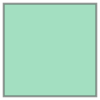

In [67]:
from shapely.geometry import Polygon
def line_to_polygon_flare(line):
    ll_x = line["boundbox_c1ll"]
    ll_y = line["boundbox_c2ll"]
    ur_x = line["boundbox_c1ur"]
    ur_y = line["boundbox_c2ur"]
    polygon = Polygon([(ll_x,ll_y),(ll_x,ur_y),(ur_x,ur_y),(ur_x,ll_y)])
    return polygon
# sot_fg_2010.at[0,"DATE_OBS"],sot_fg_2010.at[0,"DATE_END"]
flare_polygon = line_to_polygon(flare_df.iloc[0])
flare_polygon

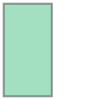

In [83]:
s=pd.Series(sot_fg_2010.loc[0])
def line_to_polygon_hinode (line):
    ll = [s["XCEN"]-s["FOVX"]//2,s["XCEN"]+s["FOVX"]//2]
    ur =[s["YCEN"]-s["FOVY"]//2,s["YCEN"]+s["FOVY"]//2]
    c=SkyCoord(ll*u.arcsec,ur*u.arcsec,frame = frames.Helioprojective,obstime= s["DATE_OBS"],observer="earth")
    c = c.transform_to(frames.HeliographicStonyhurst)
    ll_x = c.lat[0].value
    ll_y = c.lon[0].value
    ur_x = c.lat[1].value
    ur_y = c.lon[1].value
    polygon = Polygon([(ll_x,ll_y),(ll_x,ur_y),(ur_x,ur_y),(ur_x,ll_y)])
    return polygon
hinode_polygon = line_to_polygon_hinode(s)
hinode_polygon